# Exam 28th of August 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [75]:
# Insert your anonymous exam ID as a string in the variable below
examID="hej"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using **rejection** sampling:

$$
    f[x] = C (\sin(x))^{10}
$$
for $0 \leq x \leq \pi$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one). Hint: you do not need to know the value of $C$ to perform rejection sampling.

2. [2p] Produce 10000 samples (**use fewer if it takes too long**) and put the answer in `problem1_samples` from the above distribution and plot the histogram. 
3. [2p] Define $X$ as a random variable with the density given in part 1. Denote $Y = \left ( X - \frac{\pi}{2} \right)^2$ and use the above 10000 samples to estimate
$$
    \mathbb{E}[Y]
$$
and store the result in `problem1_expectation`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using **rejection** sampling:

$$
    f[x] = C (\sin(x))^{10}
$$
for $0 \leq x \leq \pi$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one). Hint: you do not need to know the value of $C$ to perform rejection sampling.

In [1]:

# Part 1

import numpy as np

# RETURNS A NUMPY ARRAY of N samples with C * sin(x)**10
def problem1_rejection(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    #xes = np.arange(0, np.pi+0.01, 0.01)
    xes = np.linspace(0, np.pi, n_samples)
    sin_xes = (np.sin(xes)**10) # list operation
    total = sum(sin_xes)
    print(f"TOTAL: {total}")
    C = 1 / total
    print(f"C: {C}")

    # Return a numpy array of length n_samples
    return C*sin_xes

print(problem1_rejection(3))

TOTAL: 1.0
C: 1.0
[0.00000000e+000 1.00000000e+000 7.58767145e-160]


2. [2p] Produce 10000 samples (**use fewer if it takes too long**) and put the answer in `problem1_samples` from the above distribution and plot the histogram. 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
TOTAL: 2460.691406249988
C: 0.0004063898453337417


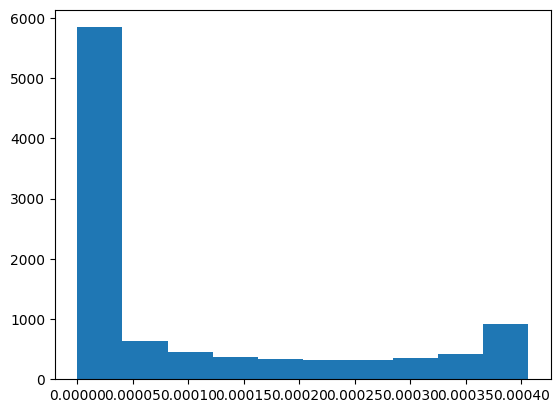

In [77]:
# Part 2
%pip install matplotlib
import matplotlib.pyplot as plt

problem1_samples = problem1_rejection(10000)

hist1 = plt.hist(problem1_samples)
plt.show(hist1)

3. [2p] Define $X$ as a random variable with the density given in part 1. Denote $Y = \left ( X - \frac{\pi}{2} \right)^2$ and use the above 10000 samples to estimate
$$
    \mathbb{E}[Y]
$$
and store the result in `problem1_expectation`.

In [78]:
# Part 3
import random as rand

tenthousand = np.linspace(0, 1, 10000)

total = sum(problem1_samples)
print(f"TOTAL; {total}")
C = 1 / total

X = np.random.choice(a=problem1_samples, size=10000)
Y = (X - np.pi/2)**2

print(f"C = {C}, total: {total}")
print(f"X = {sum(X)}")
print(f"C: {C}")

problem1_expectation = Y
print("ANSWER: " + str(problem1_expectation))

print(f"Check that C is correct: {C * sum(problem1_samples)}")

TOTAL; 1.000000000000005
C = 0.9999999999999949, total: 1.000000000000005
X = 1.005710741936534
C: 0.9999999999999949
ANSWER: [2.46740103 2.4674011  2.46739127 ... 2.4674011  2.46696873 2.46736706]
Check that C is correct: 1.0


In [91]:
# Part 4


"""
4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the expectation
above and store the result as a tuple in the variable `problem1_interval`
"""


#epsilon = np.sqrt(np.log(2/0.025) / (2 * len(problem1_expectation))) # 0.025 för 95% konfidensintervall
n = len(problem1_expectation)
alfa = 0.95
a = 0 # can range from 0 to pi
b = np.pi
print(f"C: {C}. len is: {len(problem1_expectation)}")

#epsilon = np.exp(-2*n*(alfa**2)/((b-a)**2))
epsilon = np.sqrt((b - a)**2 * np.log(1 / alfa) / (2 * n))


problem1_interval = [np.mean(problem1_expectation) - epsilon, np.mean(problem1_expectation) + epsilon]
print(f"diff: {2*epsilon}")
print(f"confidence interval: {problem1_interval}")



C: 0.9999999999999949. len is: 10000
diff: 0.010062251478011671
confidence interval: [np.float64(2.4620540503898636), np.float64(2.472116301867875)]


In [80]:
# Part 5

problem1_C = XXX

NameError: name 'XXX' is not defined

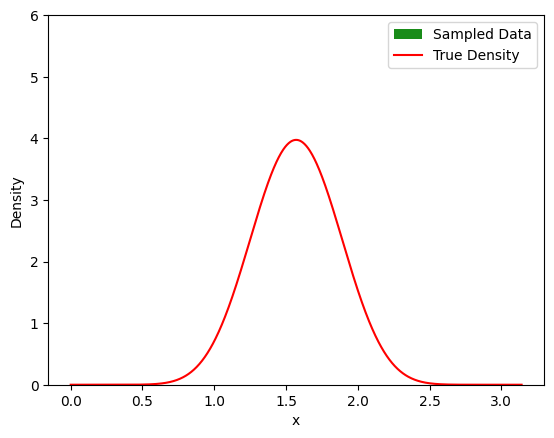

In [ ]:
# Part 5

# Write your code to produce the plot here

#XXXXXXX

# Calculate an approximation of the value of C using random samples
n_samples = 10000
samples = np.random.uniform(0, np.pi, n_samples)
f_x = (np.sin(samples))**10
C_approx = 1 / np.mean(f_x)

# Plot the histogram from part 2 together with the true density
plt.hist(problem1_samples, bins=50, density=True, alpha=0.9, color='g', label='Sampled Data')

# Plot the true density
x = np.linspace(0, np.pi, 1000)
true_density = C_approx * (np.sin(x))**10
plt.plot(x, true_density, label='True Density', color='r')

plt.xlabel('x')
plt.ylabel('Density')
plt.ylim(0, 6)  # Set the y-axis limit to 1
plt.legend()
plt.show()

# Part 5

**Double click this cell and directly edit below to answer part 5**

### Begin explanation

Bla di bla

### End explanation

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_rejection(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_expectation, float)) 
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Try again. your problem1_expectation is not a float
Good, your problem1_interval is a tuple or list of length 2


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Consider the dataset `CORIS.csv` that you find in the data folder. The data set `CORIS.csv` contains cases of coronary heart disease (CHD) and variables associated with the patient's condition: systolic blood pressure, yearly tobacco use (in kg), low density lipoprotein (Idl), adiposity, family history (0 or 1), type A personality score (typea), obesity (body mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).
In this dataset the `X` corresponds to the measurements. The `Y` is a 0-1 label where 1 represents CHD and 0 does not. The code to load the data is prepared and so is the train-test-validation split and the training of the model. The model is stored in `problem2_pipe` which is a Pipeline object as often used in composite models in sklearn, you will find in the cell corresponding to the different parts, some sample code how to use the model.

1. [3p] Use Hoeffdings inequality and compute the intervals for precision-recall etc. on the test set with 95% confidence.
2. [3p] You are interested in minimizing the average cost of your classifier. The hospital wants to use your model as a screening tool, that is, if it finds that someone is classified as CHD we interpret this as further investigation needs to take place, otherwise we do noting. After some deliberations you come to the conclusion that the following "costs" should be used (note, this is all imaginary at this point),
    * If someone has coronary heart disease but classified as not, we say it costs 300 **(this is the worst scenario)** 
    * If someone does not have coronary heart disease but classified as having it, we say it costs 10 **(this is less bad than the above issue)**
    * If someone has coronary heart disease but classified as having it, costs 0 **(We did the right thing, no cost)**
    * If someone does not have coronary heart disease but classified as not, costs 0 **(We did the right thing, no cost)**.

complete filling the function `cost` to compute the cost of a prediction model under a certain prediction threshold (recall our precision recall lecture and the `predict_proba` function from the LogisticRegression (code provided)). 

3. [4p] Now, we wish to select the threshold of our classifier that minimizes the cost, we do that by checking say 100 evenly spaced proposal thresholds between 0 and 1. Compute the optimal threshold using the testing data and calculate the cost at the chosen threshold using the testing data.
4. [3p] With your newly computed threshold value, compute the cost of putting this model in production by computing the cost using the validation data. Also provide a confidence interval of the cost using Hoeffdings inequality with a 99% confidence.

In [6]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("data/CORIS.csv",skiprows=[1,2])

# Initial data split into features and target
problem2_X = CORISDataset[['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']].values # Features
problem2_Y = CORISDataset['chd'].values # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(problem2_X,problem2_Y,train_size=0.6,random_state=42)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(X_tmp,Y_tmp,train_size=0.5,random_state=42)

# Show the shapes of the data
print(problem2_X_train.shape,problem2_Y_train.shape, problem2_X_test.shape, problem2_Y_test.shape, problem2_X_val.shape, problem2_Y_val.shape)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([('scaler',StandardScaler()),('logreg',LogisticRegression(random_state=42))])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train,problem2_Y_train)

(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

In [ ]:
# Part 1

# To make a prediction on a dataset `X` you can use the following code
# That is, as with any other sklearn model, you can use the `predict` method

# Each precision and recall should be a tuple, for instance you can write
# precision0 = (0.9,0.95)
# the 0 or 1 in the variable name indicates the class

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

predictions = problem2_pipe.predict(problem2_X_test)
datasize = len(predictions)

recalls0 = recall_score(problem2_Y_test, predictions, pos_label=0)
recalls1 = recall_score(problem2_Y_test, predictions, pos_label=1)

prec0 = precision_score(problem2_Y_test, predictions, pos_label=0)
prec1 = precision_score(problem2_Y_test, predictions, pos_label=1)


epsilon = np.sqrt(np.log(2/0.05) / (2 * datasize)) * 1 # 95% pga 0.05. 1 för range från 0 till 1
print(f"epsilon {epsilon}")

print(f"datasize: {datasize}")

problem2_precision0 = np.mean(prec0) - epsilon, np.mean(prec0) + epsilon
problem2_recall0 = np.mean(recalls0) - epsilon, np.mean(recalls0) + epsilon
problem2_precision1 = np.mean(prec1) - epsilon, np.mean(prec1) + epsilon
problem2_recall1 = np.mean(recalls1) - epsilon, np.mean(recalls1) + epsilon

print(f"recall0: {problem2_recall0}")
print(f"recall1: {problem2_recall1}")
print(f"precision0: {problem2_precision0}")
print(f"precision1: {problem2_precision1}")

# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)


epsilon 0.14159187089234018
datasize: 92
recall0: (np.float64(0.7032357153145564), np.float64(0.9864194570992367))
recall1: (np.float64(0.41723165851942456), np.float64(0.7004154003041049))
precision0: (np.float64(0.6240331291076598), np.float64(0.9072168708923402))
precision1: (np.float64(0.5369795576790884), np.float64(0.8201632994637688))


2. [3p] You are interested in minimizing the average cost of your classifier. The hospital wants to use your model as a screening tool, that is, if it finds that someone is classified as CHD we interpret this as further investigation needs to take place, otherwise we do noting. After some deliberations you come to the conclusion that the following "costs" should be used (note, this is all imaginary at this point),
    * If someone has coronary heart disease but classified as not, we say it costs 300 **(this is the worst scenario)** 
    * If someone does not have coronary heart disease but classified as having it, we say it costs 10 **(this is less bad than the above issue)**
    * If someone has coronary heart disease but classified as having it, costs 0 **(We did the right thing, no cost)**
    * If someone does not have coronary heart disease but classified as not, costs 0 **(We did the right thing, no cost)**.

complete filling the function `cost` to compute the cost of a prediction model under a certain prediction threshold (recall our precision recall lecture and the `predict_proba` function from the LogisticRegression (code provided)). 


In [23]:
# Part 2

def problem2_cost(model,threshold,X,Y):
    pred_proba = model.predict_proba(X)[:,1]
    predictions = (pred_proba >= threshold)*1

    probabilities = model.predict_proba(X)[:, 1] 
    
    # Make predictions based on the threshold
    predictions = (probabilities >= threshold).astype(int)
    
    # Calculate the cost
    cost = np.mean((1 - predictions) * Y * 300 + 10 * (1 - Y) * predictions)
    
    # Fill in what is missing to compute the cost and return it
    # Note that we are interested in average cost (cost per person)
    
    return cost

3. [4p] Now, we wish to select the threshold of our classifier that minimizes the cost, we do that by checking say 100 evenly spaced proposal thresholds between 0 and 1. Compute the optimal threshold using the testing data and calculate the cost at the chosen threshold using the testing data.

In [34]:
# Part 3

thresholds = np.arange(0, 1.01, 0.01)
from scipy.optimize import minimize
res = minimize(lambda x: problem2_cost(problem2_pipe, x, problem2_X_test, problem2_Y_test), [0.5], method='Nelder-Mead')
print(res)
problem2_optimal_threshold = res.x[0]
problem2_cost_at_optimal_threshold = problem2_cost(problem2_pipe, res.x[0], problem2_X_test, problem2_Y_test)
print(print(problem2_optimal_threshold))
print(print(problem2_cost_at_optimal_threshold))

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 5.434782608695652
             x: [ 5.000e-02]
           nit: 17
          nfev: 41
 final_simplex: (array([[ 5.000e-02],
                       [ 5.010e-02]]), array([ 5.435e+00,  5.435e+00]))
0.0499999999999996
None
5.434782608695652
None


4. [3p] With your newly computed threshold value, compute the cost of putting this model in production by computing the cost using the validation data. Also provide a confidence interval of the cost using Hoeffdings inequality with a 99% confidence.

In [41]:
# Part 4


problem2_cost_at_optimal_threshold_validation = problem2_cost(problem2_pipe, res.x[0], problem2_X_val, problem2_Y_val)
print(f"Cost on validation data: {problem2_cost_at_optimal_threshold_validation}")

# Report the cost interval as a tuple cost_interval = (a,b)


epsilon = np.sqrt(np.log(2/0.01) / (2 * len(problem2_X_val))) * 300 # 99%, range 300 in cost

problem2_cost_interval = problem2_cost_at_optimal_threshold_validation - epsilon, problem2_cost_at_optimal_threshold_validation + epsilon


print(f"epsilon: {epsilon}")
print(f"Interval: {problem2_cost_interval}")
print(f"length validation set: {len(problem2_X_val)}")

# The code below will tell you if you filled in the intervals correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

Cost on validation data: 6.129032258064516
epsilon: 50.63301246771223
Interval: (np.float64(-44.50398020964771), np.float64(56.76204472577675))
length validation set: 93


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following two Markov chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>

**Answer each question for all chains:**
1. [2p] What is the transition matrix?
2. [1p] Is the Markov chain irreducible?
3. [4p] Is the Markov chain aperiodic? What is the period for each state? Hint: Recall our definition of period; Let $\mathbb{T}:=\{t \in \mathbb{N}: P^t(x,x) > 0\}$ and the greatest common divisor of $\mathbb{T}$ is the period.
4. [2p] Being in state $A$ at time $0$ what is the probability of being in state $B$ at time $5$ (after $5$ steps)
5. [4p] Define $T$ as the first time being in state $D$ starting in state $A$. That is, if $X_0,X_1,\ldots$ is the Markov chain then define for $X_0 = "A"$
$$
    T(\omega) = \inf_{t \in \mathbb{N}} \{t: X_t(\omega) = "D"\}
$$
where the infimum over the empty set is $\infty$. Calculate $\mathbb{P}(T = 1)$, $\mathbb{P}(T = 2)$, $\mathbb{P}(T = 3)$, $\mathbb{P}(T = 4)$, $\mathbb{P}(T = 5)$, $\mathbb{P}(T = \infty)$.

In [53]:
# PART 1
from numpy.linalg import matrix_power
from numpy.linalg import matmul

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)


problem3_A    = 1# Skrev på tavlan
problem3_B    = 2# tavlan

In [ ]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = False
problem3_B_irreducible = True


In [ ]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = False
problem3_B_is_aperiodic = False

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = 2
problem3_B_periods = 2


In [57]:
# PART 4

# Answer the following with the probability of being in state B at time 5 for the two problems

from numpy.linalg import matrix_power
from numpy.linalg import matmul

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

A_matrix = [[0, 0.2, 0, 0.8],
            [0, 0, 1, 0],
            [0, 1, 0, 0],
            [0.5, 0, 0.5, 0]]

B_matrix = [[0, 1, 0, 0, 0, 0], # A
            [0, 0, 1, 0, 0, 0], # B
            [0, 0.5, 0, 0.5, 0, 0], # C
            [0, 0, 0.5, 0, 0.5, 0], # D
            [0, 0, 0, 0, 0, 1], # E
            [0.5, 0, 0, 0, 0.5, 0]] # F

print(matmul([1, 0, 0, 0], matrix_power(A_matrix, 5)))
print(matmul([1, 0, 0, 0, 0, 0], matrix_power(B_matrix, 5)))
# 0.375
problem3_A_PB5 = 0.872
problem3_B_PB5 = 0.375

[0.    0.872 0.    0.128]
[0.    0.375 0.    0.375 0.    0.25 ]


In [69]:
# PART 5

# Answer the following probabilities for T=1,2,3,4,5 and infinity
problem3_A_PT1 = 0.8
problem3_A_PT2 = 0
problem3_A_PT3 = 0 #matmul([1,0,0,0], matrix_power(A_matrix, 3))
problem3_A_PT4 = 0 #matmul([1,0,0,0], matrix_power(A_matrix, 4))
problem3_A_PT5 = 0 #matmul([1,0,0,0], matrix_power(A_matrix, 5))
problem3_A_PT_inf = 0

B2_matrix = [[0, 1, 0, 0, 0, 0], # A
            [0, 0, 1, 0, 0, 0], # B
            [0, 0.5, 0, 0.5, 0, 0], # C
            [0, 0, 0, 1, 0, 0], # D, sätt 1 att den går tbks till sig själv. 
            [0, 0, 0, 0, 0, 1], # E
            [0.5, 0, 0, 0, 0.5, 0]] # F

problem3_B_PT1 = matmul([1,0,0,0,0,0], matrix_power(B2_matrix, 1))
problem3_B_PT2 = matmul([1,0,0,0,0,0], matrix_power(B2_matrix, 2))
problem3_B_PT3 = matmul([1,0,0,0,0,0], matrix_power(B2_matrix, 3))
problem3_B_PT4 = matmul([1,0,0,0, 0, 0], matrix_power(B2_matrix, 4)) 
problem3_B_PT5 = matmul([1,0,0,0,0,0], matrix_power(B2_matrix, 5))
problem3_B_PT_inf = 0 # pga gränsvärde, om det går mot oändligheten är det 0


print(problem3_B_PT1[3])
print(problem3_B_PT2[3])
print(problem3_B_PT3[3])
print(problem3_B_PT4[3])
print(problem3_B_PT5[3])

0.0
0.0
0.5
0.5
0.75
